In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image


C:\Users\bhumi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False
x=InceptionV3_model.output
x=GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.3)(x)
output=Dense(units=4,activation='softmax')(x)
model=Model(InceptionV3_model.input,output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [3]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics='accuracy')

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(r'C:\Users\bhumi\Downloads\chest_ct_scan\chest_ct_scan\Data\train',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')
test_set = train_datagen.flow_from_directory(r'C:\Users\bhumi\Downloads\chest_ct_scan\chest_ct_scan\Data\test',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')
model1 = model.fit_generator(training_set,validation_data=test_set,epochs=12,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


C:\Users\bhumi\AppData\Local\Temp/ipykernel_21180/51110564.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1 = model.fit_generator(training_set,validation_data=test_set,epochs=12,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/12
20/20 [==============================] - 37s 2s/step - loss: 1.3793 - accuracy: 0.3279 - val_loss: 1.1948 - val_accuracy: 0.5333
Epoch 2/12
20/20 [==============================] - 34s 2s/step - loss: 1.2308 - accuracy: 0.4682 - val_loss: 1.0869 - val_accuracy: 0.5587
Epoch 3/12
20/20 [==============================] - 34s 2s/step - loss: 1.1319 - accuracy: 0.5204 - val_loss: 1.0305 - val_accuracy: 0.5746
Epoch 4/12
20/20 [==============================] - 34s 2s/step - loss: 1.0362 - accuracy: 0.5644 - val_loss: 0.9175 - val_accuracy: 0.6127
Epoch 5/12
20/20 [==============================] - 34s 2s/step - loss: 0.9921 - accuracy: 0.5791 - val_loss: 0.8926 - val_accuracy: 0.6127
Epoch 6/12
20/20 [==============================] - 34s 2s/step - loss: 0.9358 - accuracy: 0.6085 - val_loss: 0.8635 - val_accuracy: 0.6413
Epoch 7/12
20/20 [==============================] - 34s 2s/step - loss: 0.8932 - accuracy: 0.6020 - val_loss: 0.8852 - val_accuracy: 0.6032
Epoch 8/12
20/20 [==

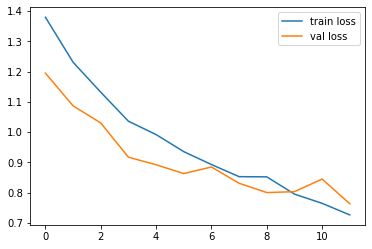

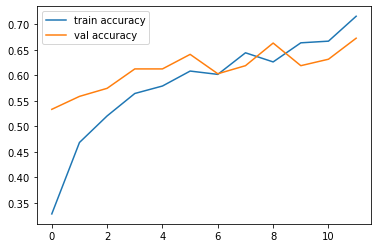

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(model1.history['loss'], label='train loss')
plt.plot(model1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(model1.history['accuracy'], label='train accuracy')
plt.plot(model1.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')